In [1]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
data = pd.read_csv(r"C:\Users\Pooja\Desktop\AI Project\OnlineShopping_Data.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Data Preparation

In [3]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data['Description'].nunique()

4223

In [6]:
data['Description'].value_counts().sort_values(ascending=False).head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64

In [7]:
#removing rows where customerID are NA
data.dropna(subset=['CustomerID'],how='all',inplace=True)
data.shape

(406829, 8)

### Exploratory Data Analysis

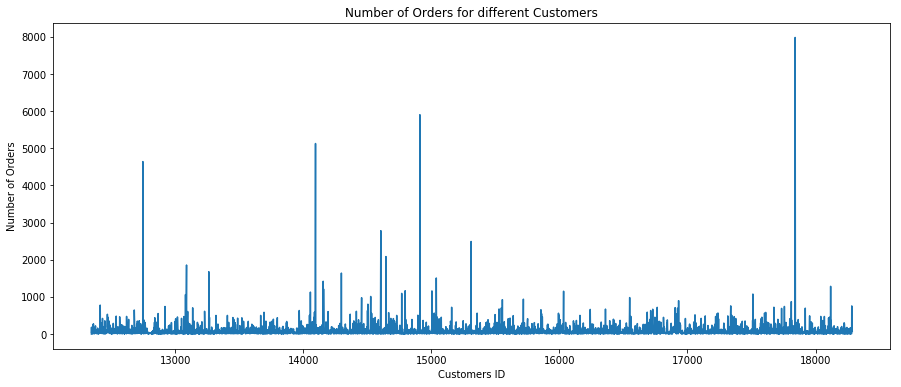

In [8]:
orders = data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [9]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with most number of orders...


,CustomerID,Country,InvoiceNo
4050,17841.0,United Kingdom,7983
1903,14911.0,EIRE,5903
1308,14096.0,United Kingdom,5128
338,12748.0,United Kingdom,4642
1682,14606.0,United Kingdom,2782


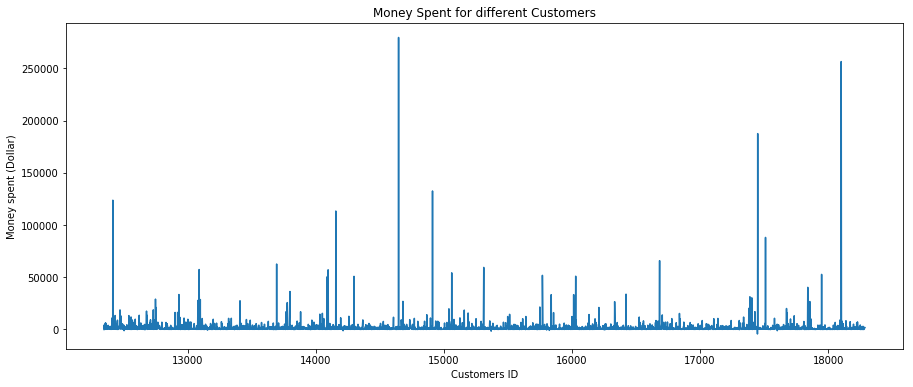

In [10]:
data['amount_spent'] = data['Quantity'] * data['UnitPrice']
money_spent = data.groupby(by=['CustomerID','Country'], as_index=False)['amount_spent'].sum()
plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [11]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,CustomerID,Country,amount_spent
1711,14646.0,Netherlands,279489.02
4241,18102.0,United Kingdom,256438.49
3766,17450.0,United Kingdom,187482.17
1903,14911.0,EIRE,132572.62
57,12415.0,Australia,123725.45


Text(0.5, 1.0, 'Number of orders - Countrywise')

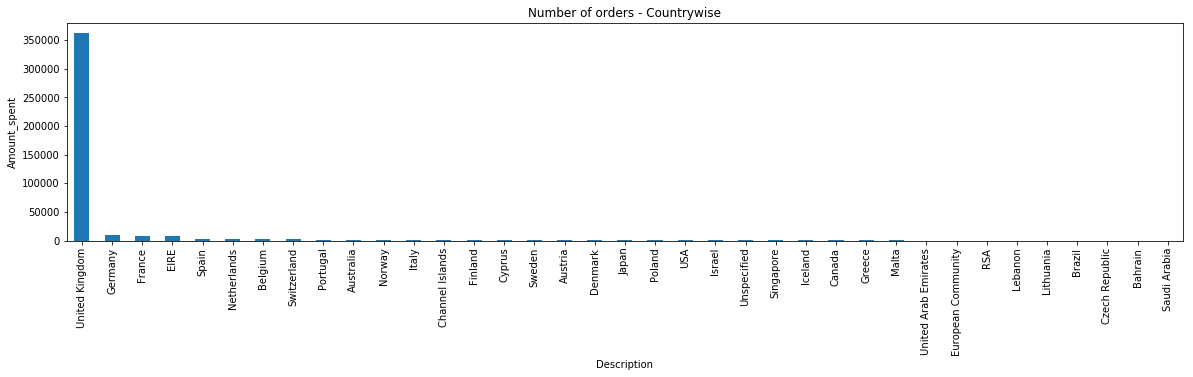

In [12]:
fig, ax=plt.subplots(figsize=(20,4))
data['Country'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Amount_spent')
plt.xlabel('Description')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Number of orders - Countrywise')

## Market Segmentation

### Behavioral Segmentation

In [13]:
#finding last date available in our dataset
data['InvoiceDate'].max()

'9/9/2011 9:52'

In [14]:
now= dt.date(2011,9,9)
print(now)

2011-09-09


In [15]:
data = data[data['InvoiceDate']>= "2010-12-09"]
data.shape

(203750, 9)

In [16]:
data['New_Date'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')
data.drop('amount_spent',axis=1,inplace=True)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,New_Date
105335,545220,21955,DOORMAT UNION JACK GUNS AND ROSES,2,3/1/2011 8:30,7.95,14620.0,United Kingdom,2011-03-01 08:30:00
105336,545220,48194,DOORMAT HEARTS,2,3/1/2011 8:30,7.95,14620.0,United Kingdom,2011-03-01 08:30:00
105337,545220,22556,PLASTERS IN TIN CIRCUS PARADE,12,3/1/2011 8:30,1.65,14620.0,United Kingdom,2011-03-01 08:30:00
105338,545220,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,3/1/2011 8:30,4.95,14620.0,United Kingdom,2011-03-01 08:30:00
105339,545220,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,3/1/2011 8:30,3.75,14620.0,United Kingdom,2011-03-01 08:30:00


In [17]:
#creating a new column called date which contains the date of invoice only
data['date'] = data['New_Date'].dt.date

In [18]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,New_Date,date
105335,545220,21955,DOORMAT UNION JACK GUNS AND ROSES,2,3/1/2011 8:30,7.95,14620.0,United Kingdom,2011-03-01 08:30:00,2011-03-01
105336,545220,48194,DOORMAT HEARTS,2,3/1/2011 8:30,7.95,14620.0,United Kingdom,2011-03-01 08:30:00,2011-03-01
105337,545220,22556,PLASTERS IN TIN CIRCUS PARADE,12,3/1/2011 8:30,1.65,14620.0,United Kingdom,2011-03-01 08:30:00,2011-03-01
105338,545220,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,3/1/2011 8:30,4.95,14620.0,United Kingdom,2011-03-01 08:30:00,2011-03-01
105339,545220,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,3/1/2011 8:30,3.75,14620.0,United Kingdom,2011-03-01 08:30:00,2011-03-01


In [19]:
#grouping by customers and checking last date of purchase
recency= data.groupby(by='CustomerID', as_index=False)['date'].max()
recency.columns = ['CustomerID','LastshoppingDate']
recency.tail()

,CustomerID,LastshoppingDate
3189,18280.0,2011-03-07
3190,18281.0,2011-06-12
3191,18282.0,2011-08-09
3192,18283.0,2011-09-05
3193,18287.0,2011-05-22


In [20]:
#RFM analysis for behavioral segmentation
#calculate recency
recency['Recency'] = recency['LastshoppingDate'].apply(lambda x: (now - x).days)
recency.tail()

,CustomerID,LastshoppingDate,Recency
3189,18280.0,2011-03-07,186
3190,18281.0,2011-06-12,89
3191,18282.0,2011-08-09,31
3192,18283.0,2011-09-05,4
3193,18287.0,2011-05-22,110


In [21]:
recency.drop('LastshoppingDate',axis=1,inplace=True)

In [22]:
# dropping duplicates
data_new = data
data_new.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#calculating frequency of purchases
frequency = data_new.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency.columns = ['CustomerID','Frequency']
frequency.tail()

,CustomerID,Frequency
3189,18280.0,1
3190,18281.0,1
3191,18282.0,2
3192,18283.0,7
3193,18287.0,1


In [23]:
#creating column total cost
data['TotalCost'] = data['Quantity'] * data['UnitPrice']
monetary = data.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
monetary.columns = ['CustomerID','Monetary']
monetary.tail()

,CustomerID,Monetary
3189,18280.0,23.70
3190,18281.0,5.04
3191,18282.0,11.30
3192,18283.0,35.95
3193,18287.0,10.20


In [24]:
###Creating RFM Table

#merging recency dataframe with frequency dataframe
Merge= recency.merge(frequency,on='CustomerID')
Merge.tail()
#merging with monetary dataframe to get a table with the 3 columns
rfm_table = Merge.merge(monetary,on='CustomerID')
#using CustomerID as index
rfm_table.set_index('CustomerID',inplace=True)
#checking the tail
rfm_table.tail()

,Recency,Frequency,Monetary
CustomerID,,,
18280.0,186,1,23.70
18281.0,89,1,5.04
18282.0,31,2,11.30
18283.0,4,7,35.95
18287.0,110,1,10.20


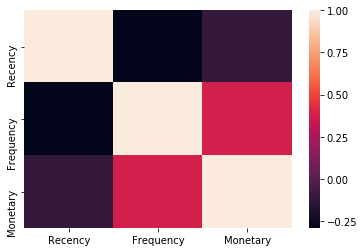

In [25]:
sns.heatmap(rfm_table.corr())

In [ ]:
    # in the above correlation matrix, recency has negative correlation with frequency and Monetary.
    # Monetary and Frequency seem to have positive correlation.

In [26]:
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,-7.0,1.0,14.85
0.50,24.0,2.0,31.40
0.75,88.0,4.0,83.10


In [27]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4


In [28]:
#creating rfm segmentation table
customer_Segments = rfm_table
customer_Segments['R_Quartile'] = customer_Segments['Recency'].apply(RScore, args=('Recency',quantiles,))
customer_Segments['F_Quartile'] = customer_Segments['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
customer_Segments['M_Quartile'] = customer_Segments['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [29]:
customer_Segments.tail()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
18280.0,186,1,23.70,1,1,2
18281.0,89,1,5.04,1,1,1
18282.0,31,2,11.30,2,2,1
18283.0,4,7,35.95,3,4,3
18287.0,110,1,10.20,1,1,1


In [30]:
customer_Segments['RFM_score'] = customer_Segments.R_Quartile.map(str) \
                            + customer_Segments.F_Quartile.map(str) \
                            + customer_Segments.M_Quartile.map(str)
customer_Segments.tail()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_score
CustomerID,,,,,,,
18280.0,186,1,23.70,1,1,2,112
18281.0,89,1,5.04,1,1,1,111
18282.0,31,2,11.30,2,2,1,221
18283.0,4,7,35.95,3,4,3,343
18287.0,110,1,10.20,1,1,1,111


In [31]:
customer_Segments['RFM_Rank'] = customer_Segments[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)
customer_Segments.tail()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_score,RFM_Rank
CustomerID,,,,,,,,
18280.0,186,1,23.70,1,1,2,112,4
18281.0,89,1,5.04,1,1,1,111,3
18282.0,31,2,11.30,2,2,1,221,5
18283.0,4,7,35.95,3,4,3,343,10
18287.0,110,1,10.20,1,1,1,111,3


In [32]:
# Defining rfm_rank function
def rfm_Rank(customer_Segments):
    if customer_Segments['RFM_Rank'] >= 9:
        return 'Best Customers or Champions'
    elif ((customer_Segments['RFM_Rank'] >= 8) and (customer_Segments['RFM_Rank'] < 9)):
        return 'Loyal Customers'
    elif ((customer_Segments['RFM_Rank'] >= 7) and (customer_Segments['RFM_Rank'] < 8)):
        return 'Potential Customers'
    elif ((customer_Segments['RFM_Rank'] >= 6) and (customer_Segments['RFM_Rank'] < 7)):
        return 'Promising Customers'
    elif ((customer_Segments['RFM_Rank'] >= 5) and (customer_Segments['RFM_Rank'] < 6)):
        return 'Churning Customers'
    else:
        return 'Churned Customers'
# Creating a new variable Type of Customer
customer_Segments['Type of Customer'] = customer_Segments.apply(rfm_Rank, axis=1)
customer_Segments.tail()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_score,RFM_Rank,Type of Customer
CustomerID,,,,,,,,,
18280.0,186,1,23.70,1,1,2,112,4,Churned Customers
18281.0,89,1,5.04,1,1,1,111,3,Churned Customers
18282.0,31,2,11.30,2,2,1,221,5,Churning Customers
18283.0,4,7,35.95,3,4,3,343,10,Best Customers or Champions
18287.0,110,1,10.20,1,1,1,111,3,Churned Customers


In [33]:
# Calculating average values for each RFM_Level, and returning a size of each segment 
rfm_final = customer_Segments.groupby('Type of Customer').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

In [34]:
rfm_final.tail(7)

Recency Frequency Monetary      
                               mean      mean     mean count
Type of Customer                                            
Best Customers or Champions     0.1       7.4    316.2  1100
Churned Customers             126.7       1.1     -2.6   621
Churning Customers             75.2       1.3     15.6   344
Loyal Customers                22.0       2.8     61.8   312
Potential Customers            31.2       2.2     52.0   422
Promising Customers            52.3       1.7     38.8   395

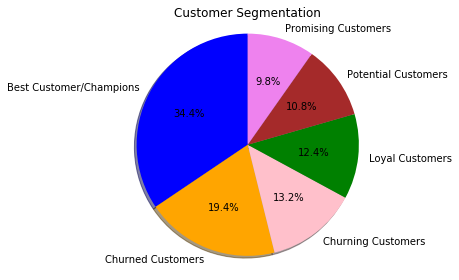

In [35]:
labels = ['Best Customer/Champions', 'Churned Customers', 'Churning Customers', 'Loyal Customers','Potential Customers','Promising Customers']
sizes = customer_Segments['Type of Customer'].value_counts(sort = True)
colors = ['blue' ,'orange','pink','green','brown','violet','red',]
plt.pie(sizes, colors=colors, labels = labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Customer Segmentation')
plt.axis('equal')
plt.tight_layout ()
plt.show()

### Geographic segmention 

In [36]:
data = pd.read_csv(r"C:\Users\Pooja\Desktop\AI Project\OnlineShopping_Data.csv")

In [37]:
# Stripping extra spaces in the description 
data['Description'] = data['Description'].str.strip()  
# Dropping the rows without any invoice number 
data.dropna(axis = 0, subset =['InvoiceNo'], inplace = True) 
data['InvoiceNo'] = data['InvoiceNo'].astype('str')  
# Dropping all transactions which were done on credit 
data = data[~data['InvoiceNo'].str.contains('C')]

In [38]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Text(0.5, 1.0, 'countrywise')

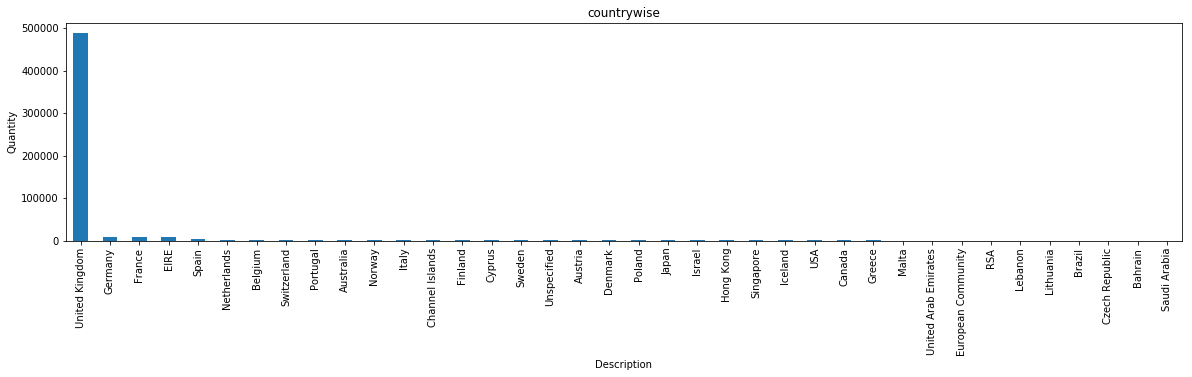

In [39]:
fig, ax=plt.subplots(figsize=(20,4))
data['Country'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Quantity')
plt.xlabel('Description')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('countrywise')

In [40]:
# Defining the hot encoding function to make the data suitable  
# for the concerned libraries 
def Onehot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

In [41]:
# Transactions done in France 
basket_France = (data[data['Country'] =="France"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

# Encoding the datasets 
basket_encoded = basket_France.applymap(Onehot_encode) 
basket_France = basket_encoded 
basket_France.drop('POSTAGE', inplace=True, axis=1)

frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head() 

#Antecedents - Item found within the data
#Consequents - Item found in combination with antecedent.
#Support - measure of how frequent an itemset is in all the transactions.
#confidence - measure defines the likeliness of occurrence of consequent on the cart given that the cart already has the antecedents.
#Lift - Lift controls for the support (frequency) of consequent while calculating the conditional probability of occurrence of {Y} given {X}.
#Conviction -Consequent highly depending on antecedent

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
81,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
82,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796
67,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
9,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.068878,0.071429,0.063776,0.925926,12.962963,0.058856,12.535714
38,(PACK OF 6 SKULL PAPER PLATES),(PACK OF 6 SKULL PAPER CUPS),0.056122,0.063776,0.051020,0.909091,14.254545,0.047441,10.298469


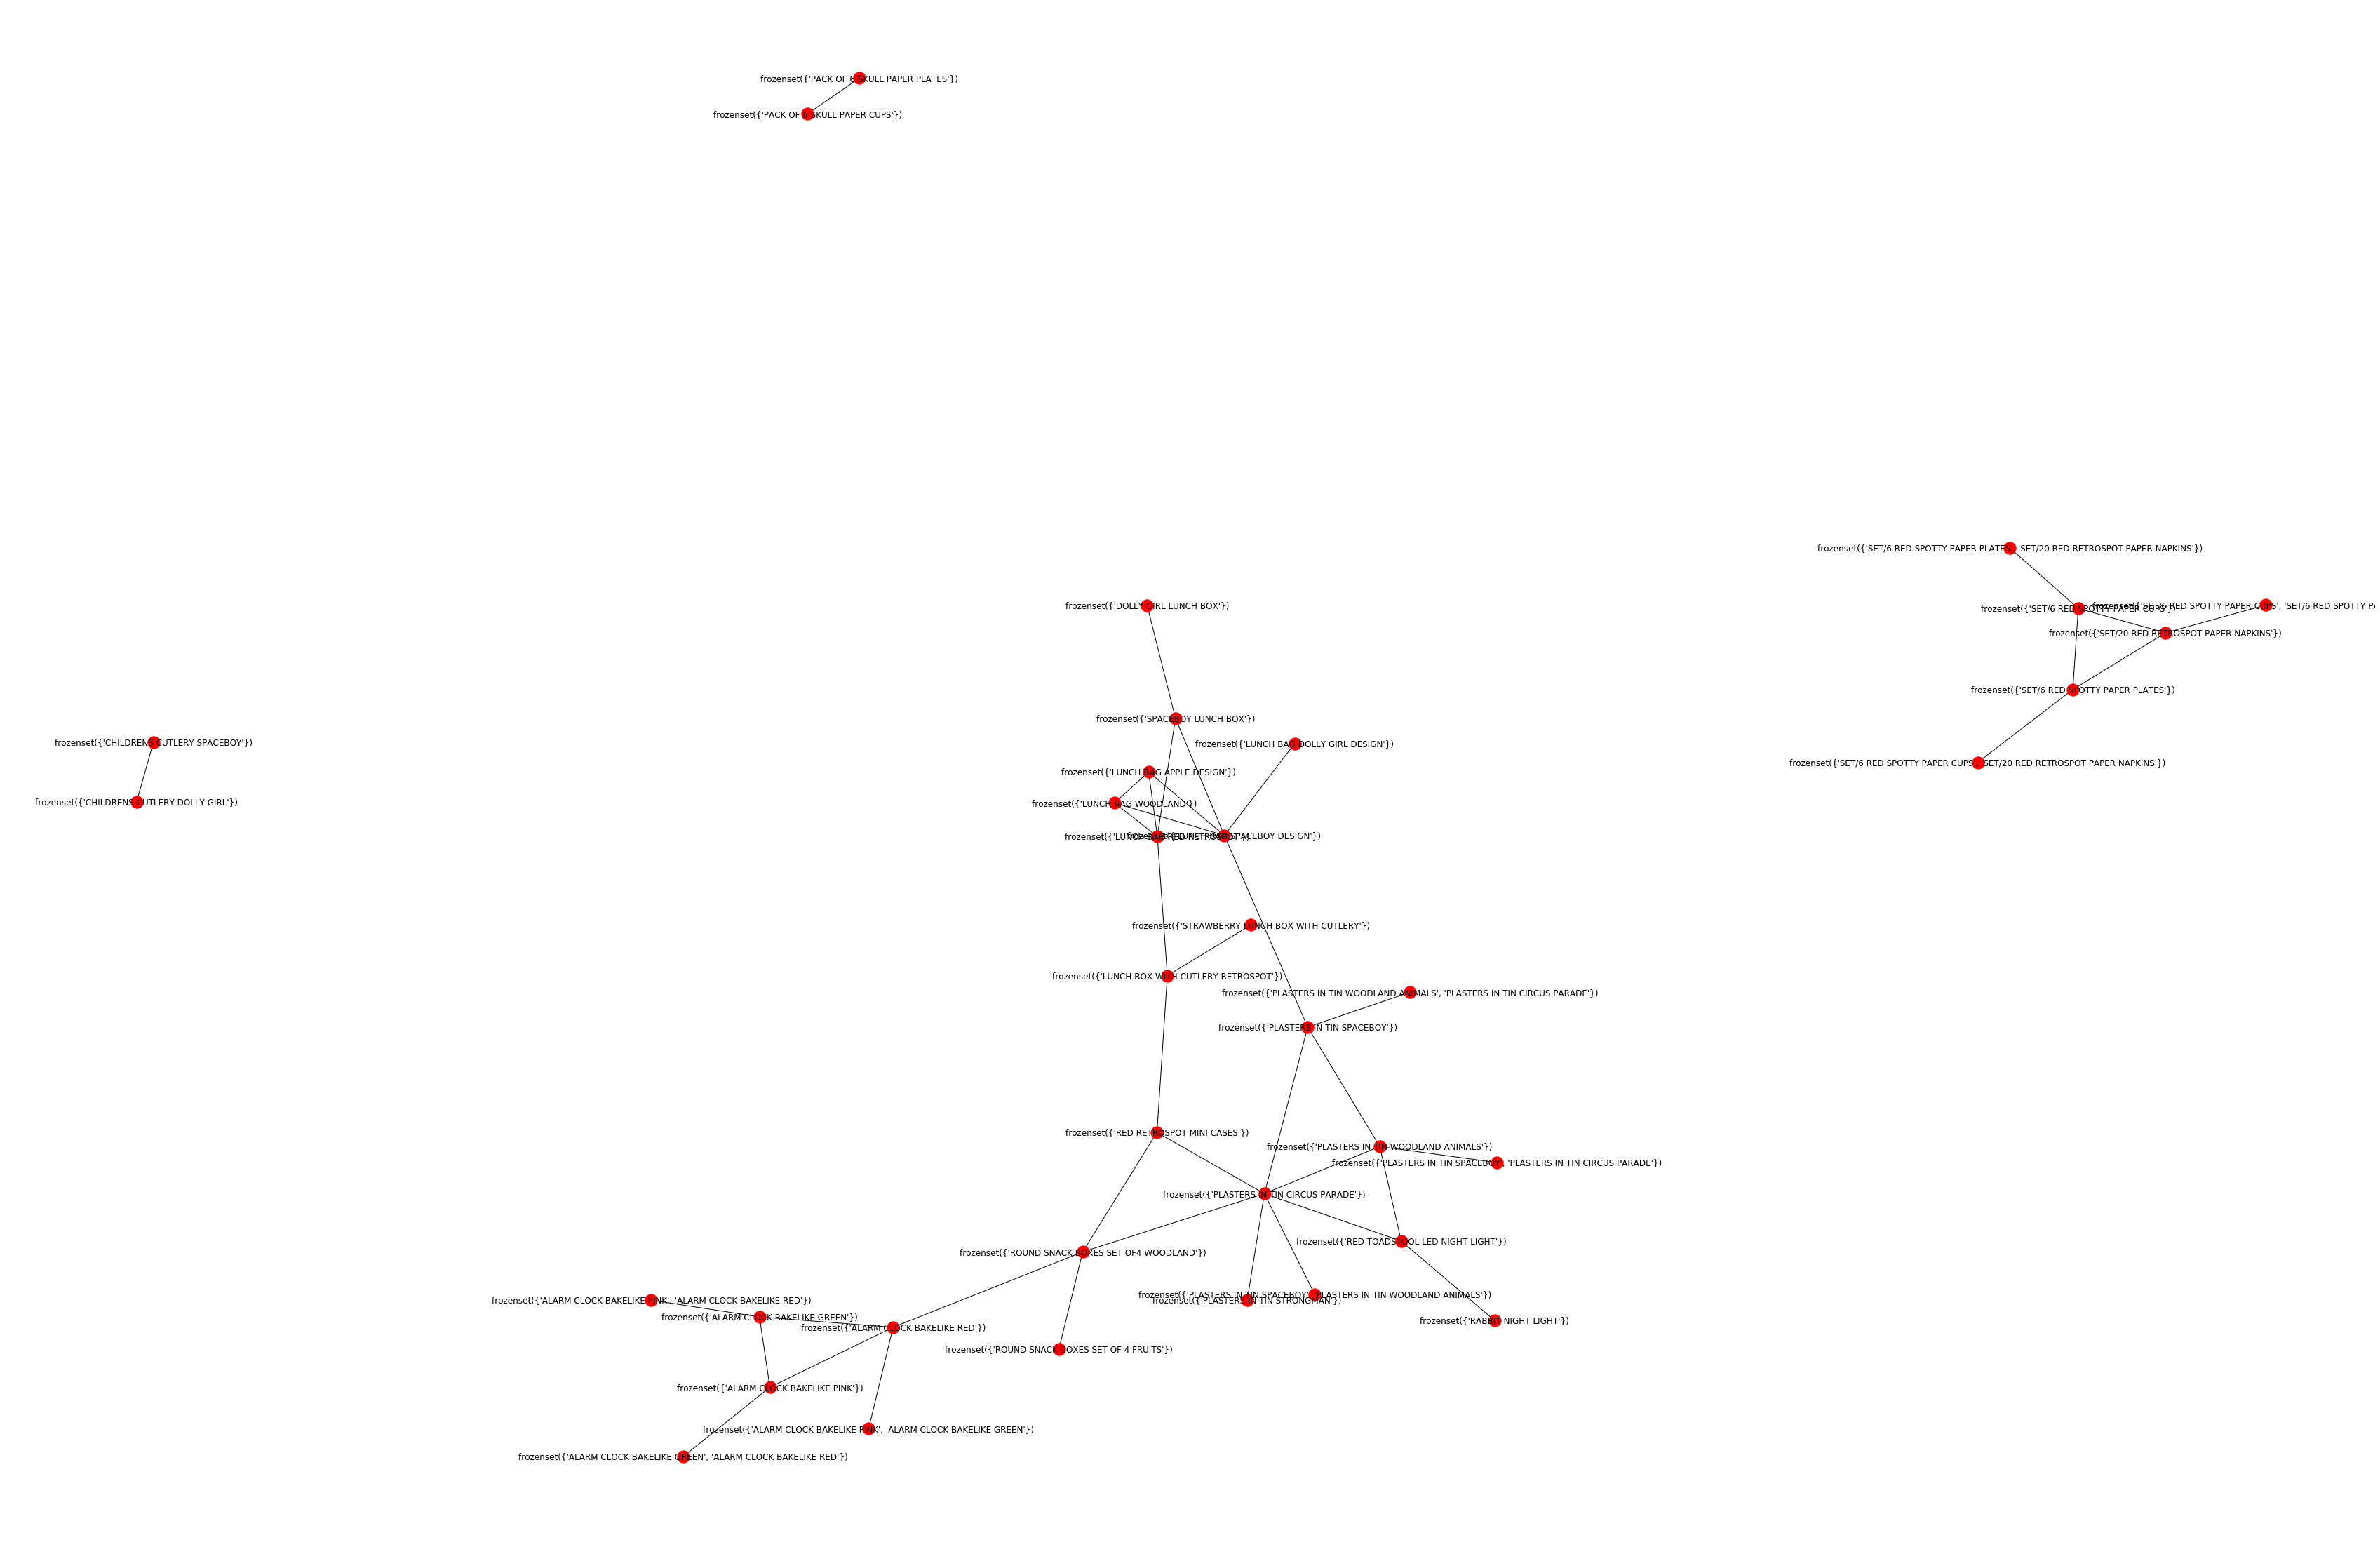

In [42]:
fig, ax=plt.subplots(figsize=(60,40))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [43]:
# Transactions done in Germany 
basket_Germany = (data[data['Country'] =="Germany"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

# Encoding the datasets 
basket_encoded = basket_Germany.applymap(Onehot_encode) 
basket_Germany = basket_encoded 
basket_Germany.drop('POSTAGE', inplace=True, axis=1)

frq_items = apriori(basket_Germany, min_support = 0.05, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head() 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746
13,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540
15,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427
1,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
6,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670


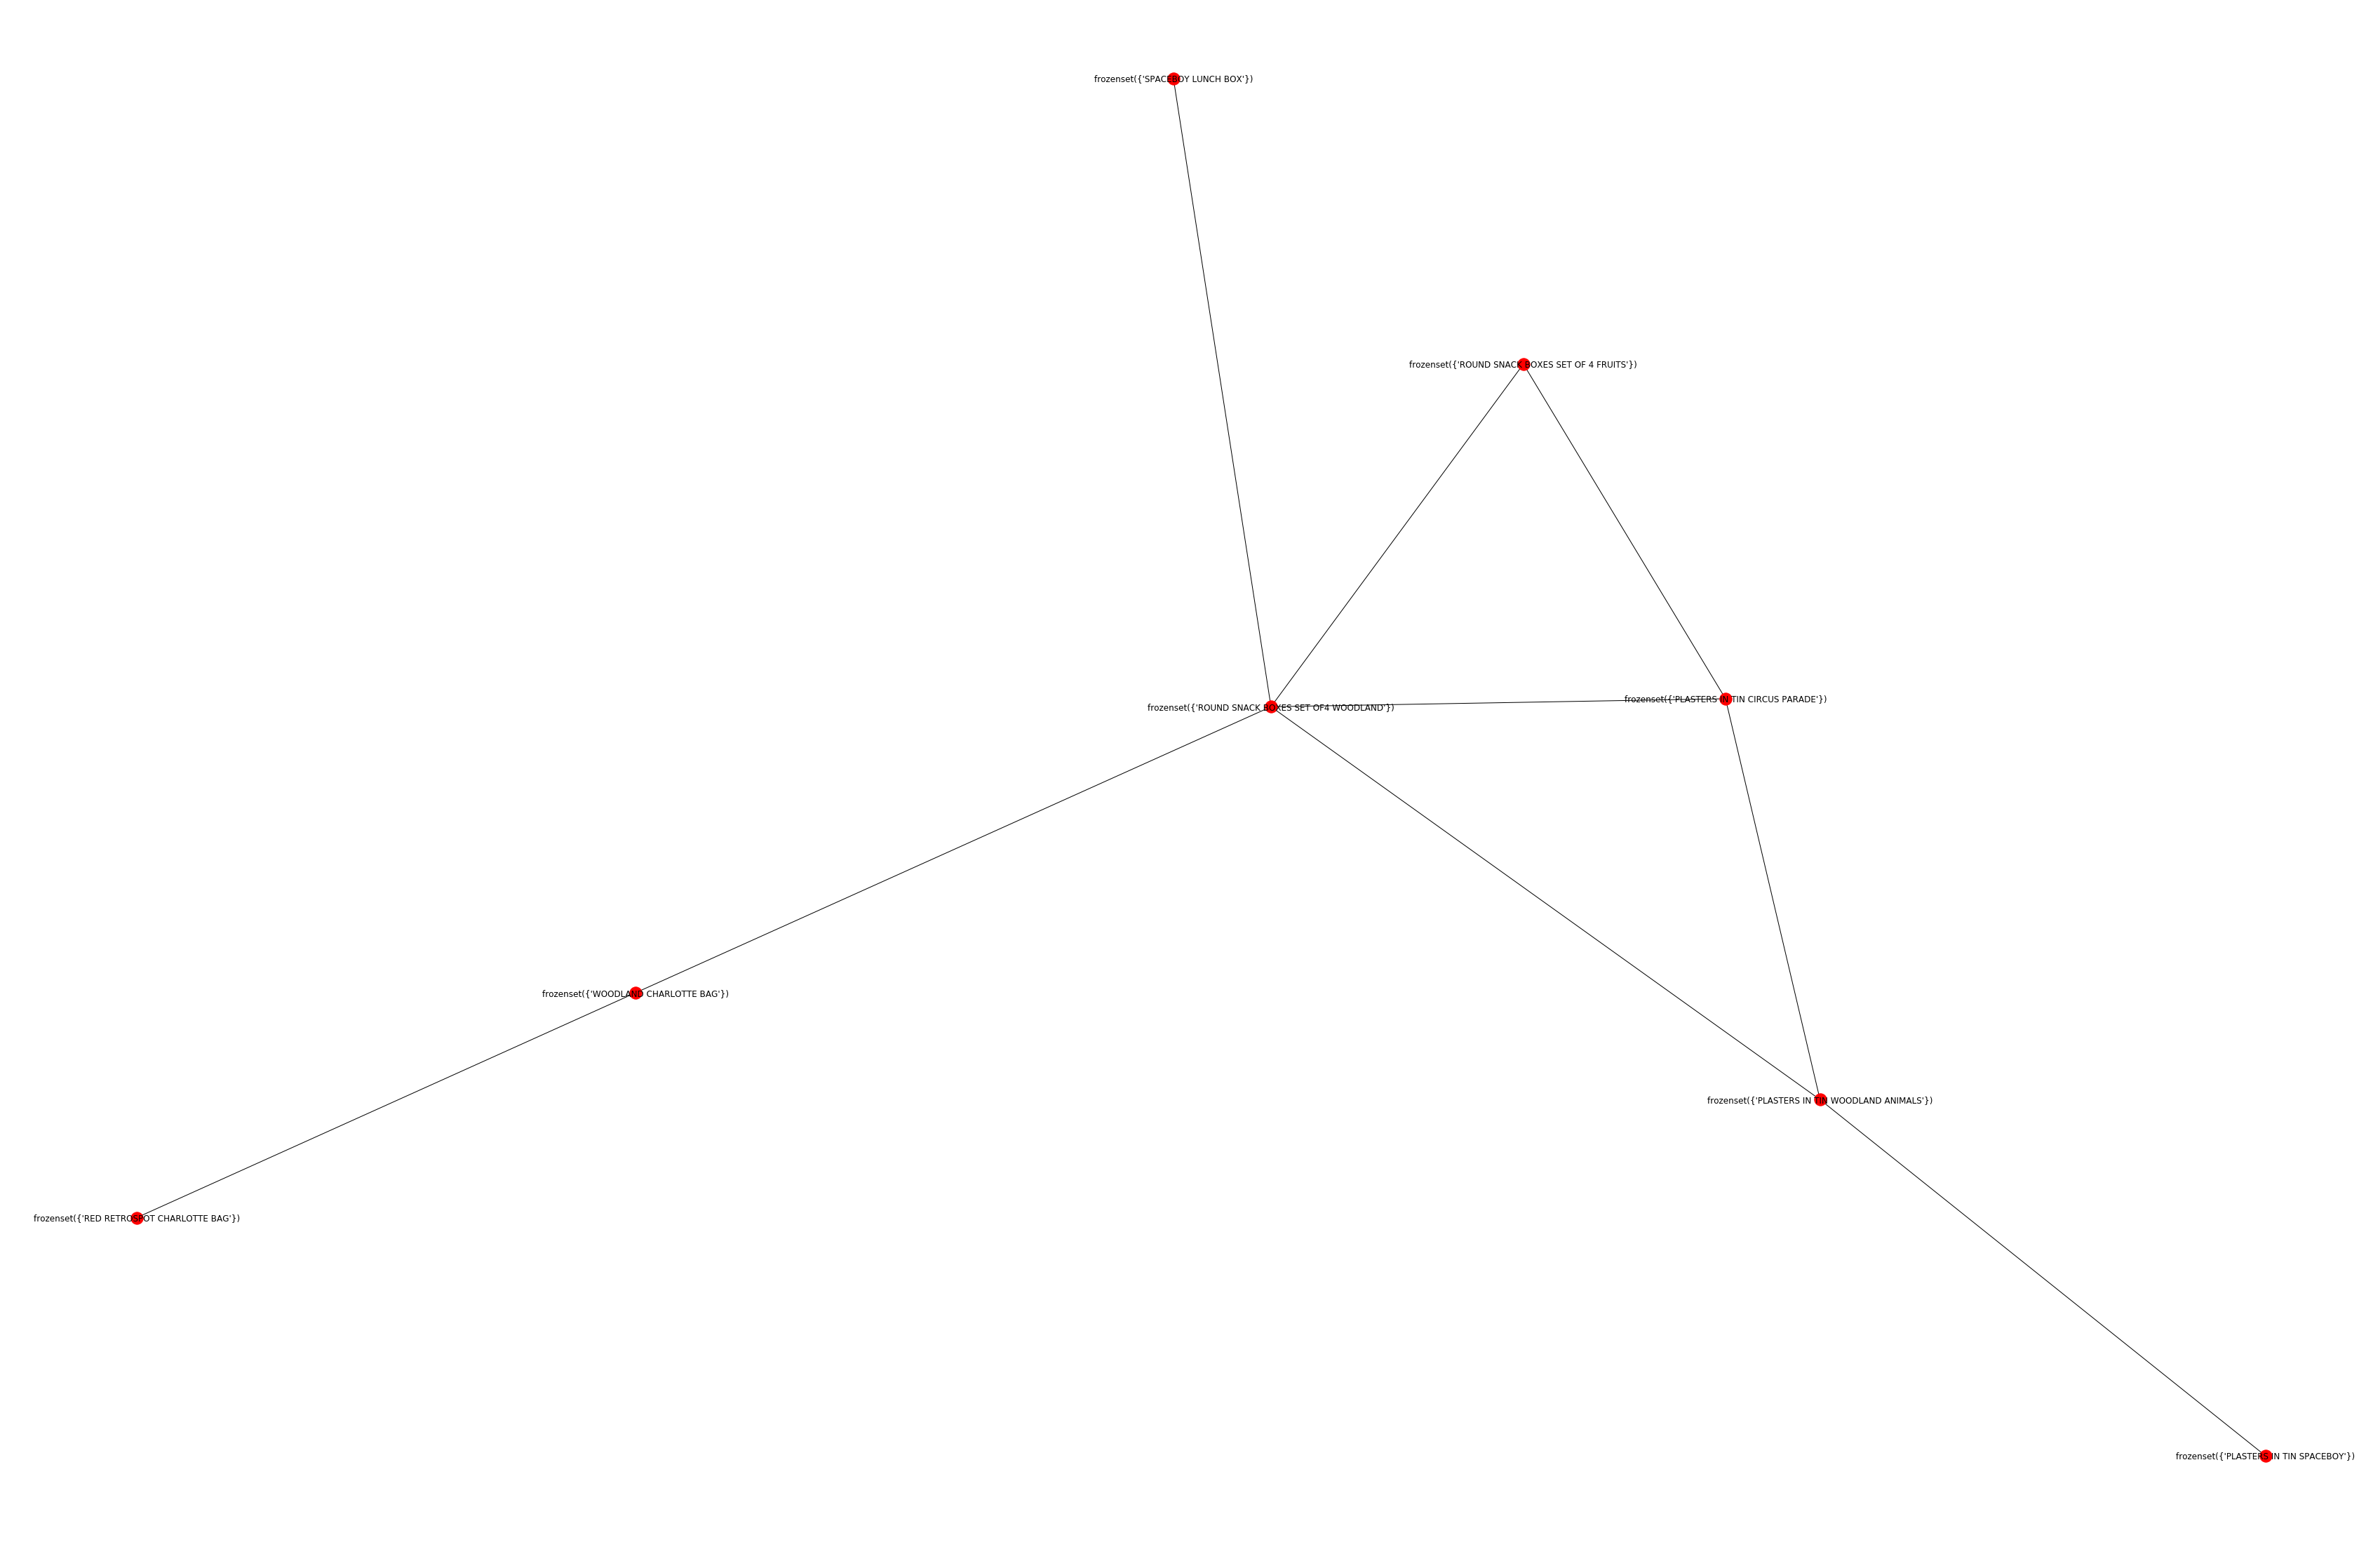

In [44]:
fig, ax=plt.subplots(figsize=(60,40))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [45]:
# Transactions done in Sweden 
basket_Sweden = (data[data['Country'] =="Sweden"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

# Encoding the datasets 
basket_encoded = basket_Sweden.applymap(Onehot_encode) 
basket_Sweden = basket_encoded
basket_Sweden.drop('POSTAGE', inplace=True, axis=1)

frq_items = apriori(basket_Sweden, min_support = 0.05, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(12 PENCILS SMALL TUBE SKULL),(PACK OF 72 SKULL CAKE CASES),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
1,(PACK OF 72 SKULL CAKE CASES),(12 PENCILS SMALL TUBE SKULL),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
4,(36 DOILIES DOLLY GIRL),(ASSORTED BOTTLE TOP MAGNETS),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
5,(ASSORTED BOTTLE TOP MAGNETS),(36 DOILIES DOLLY GIRL),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
178,(CHILDRENS CUTLERY CIRCUS PARADE),(CHILDRENS CUTLERY DOLLY GIRL),0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf


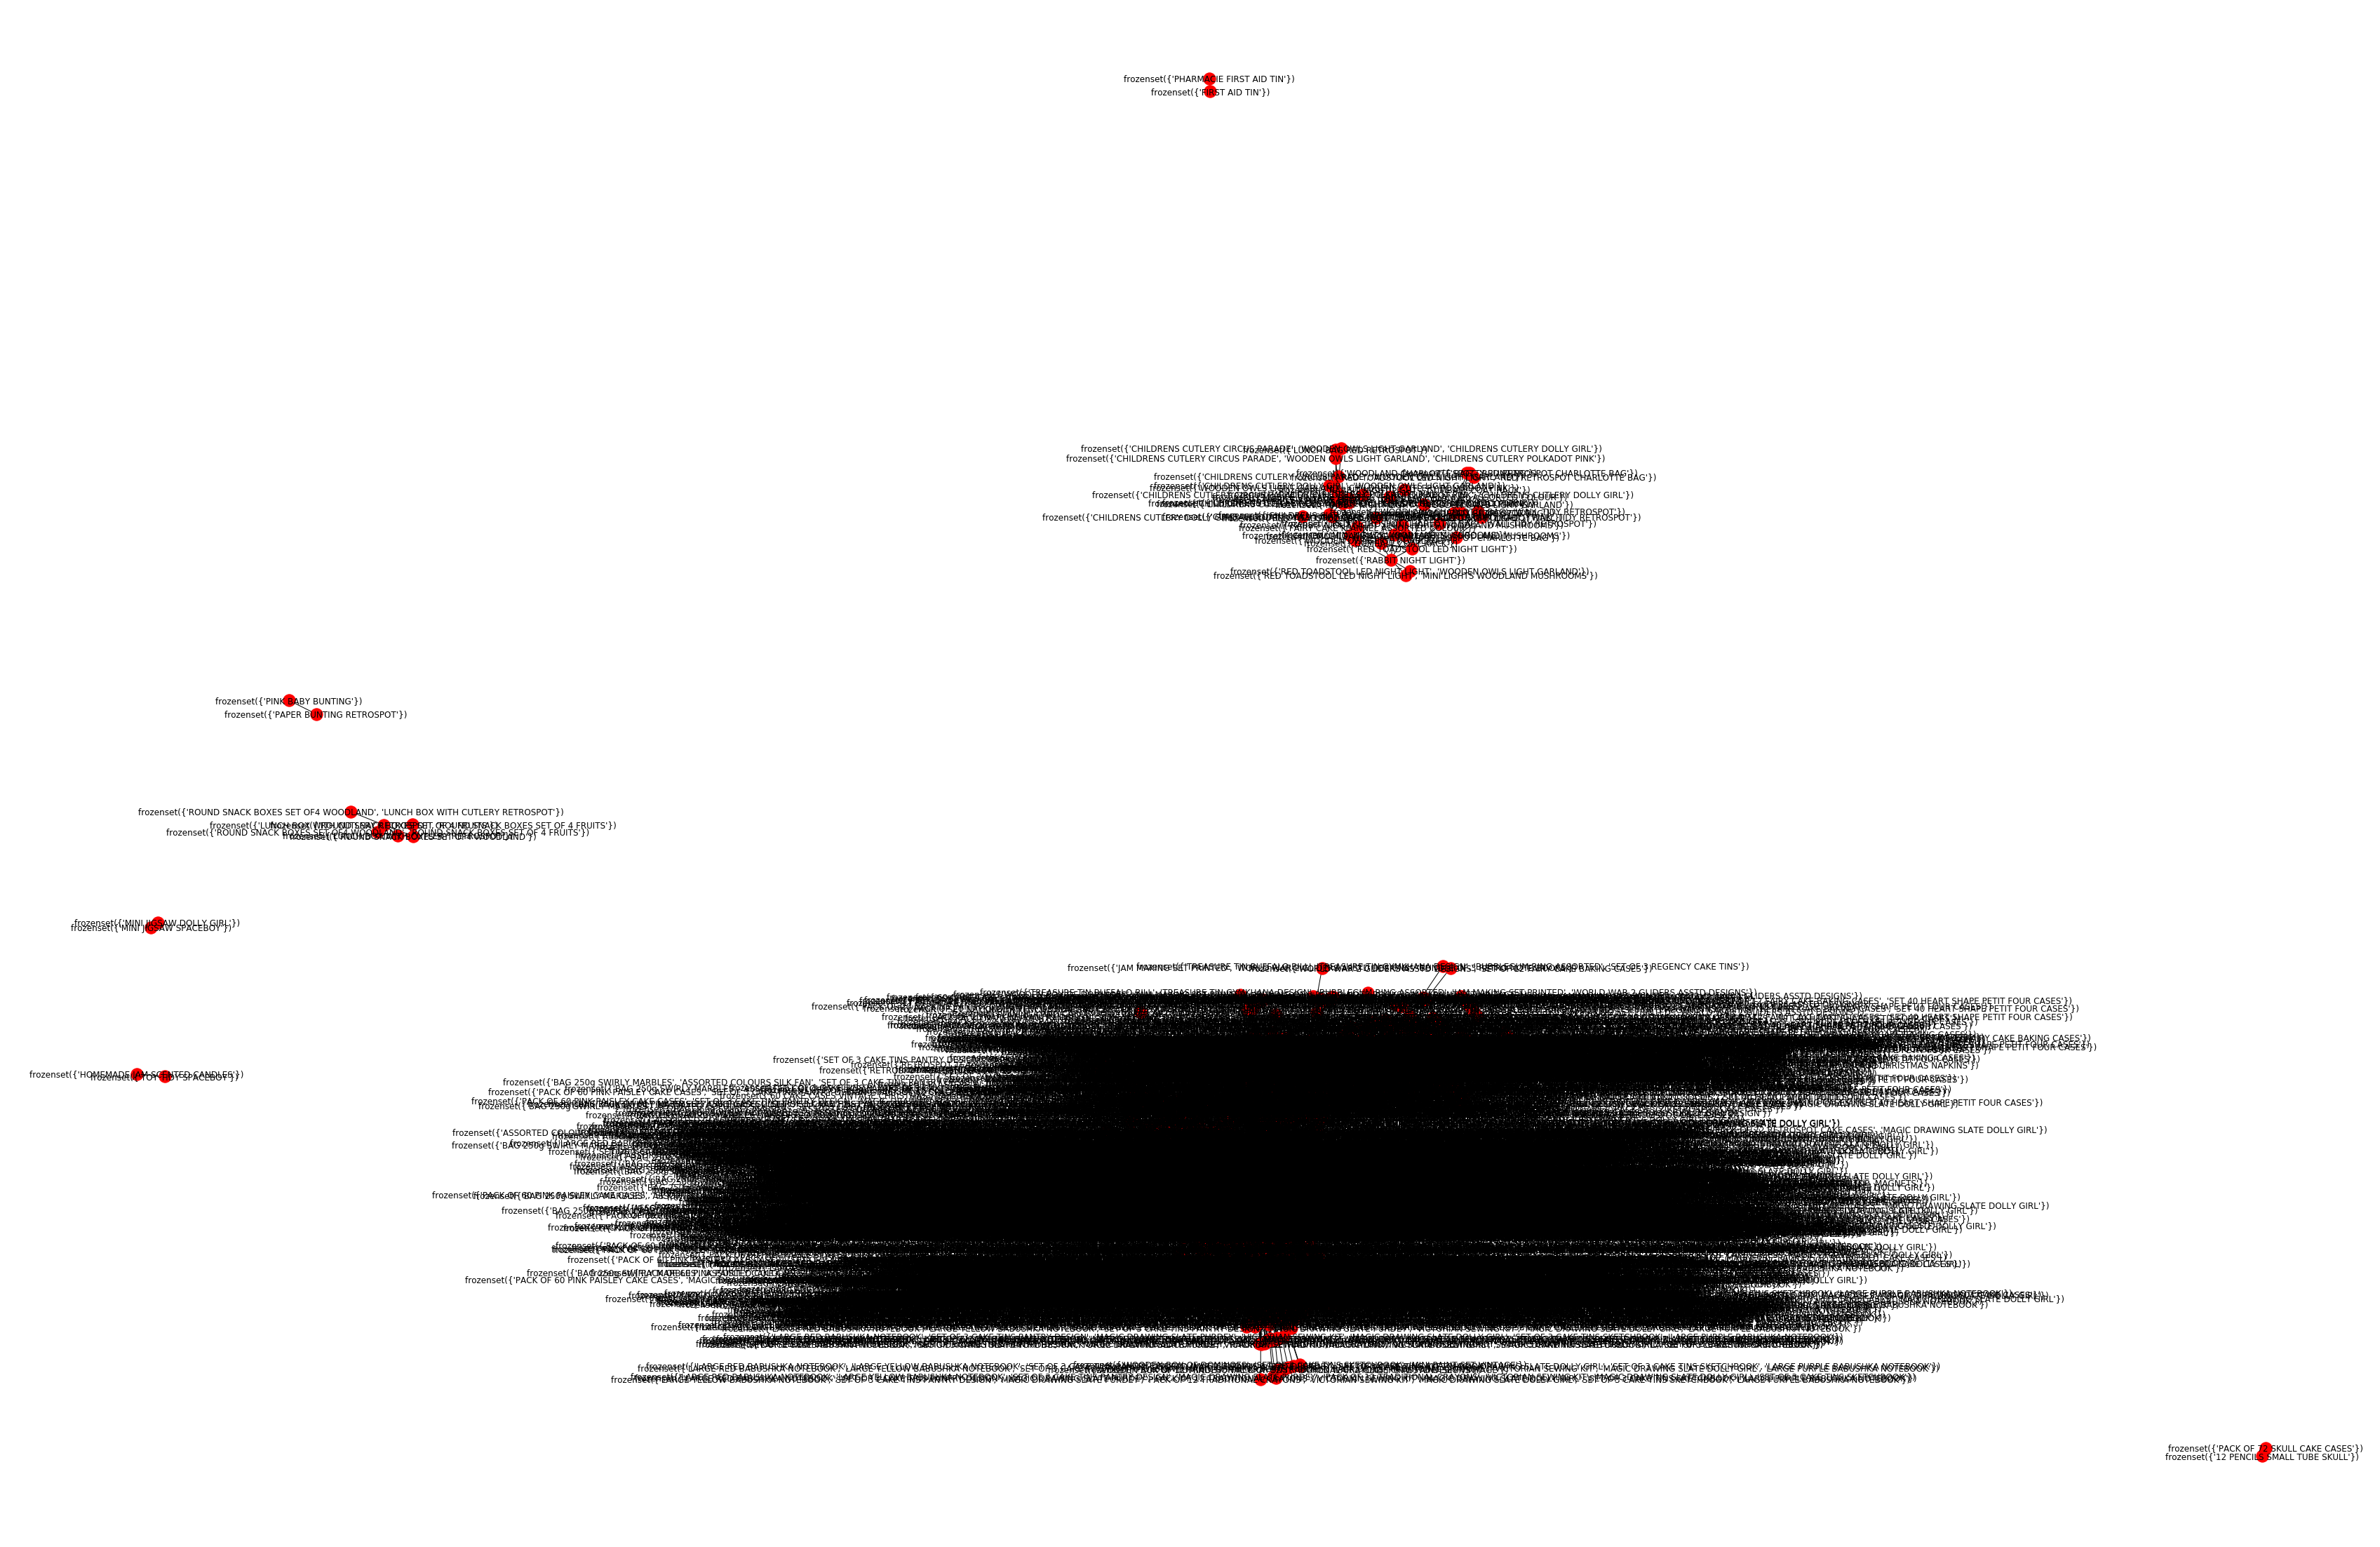

In [47]:
fig, ax=plt.subplots(figsize=(60,40))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()